<a href="https://colab.research.google.com/github/Baty2025/Machine_learning_Introduction/blob/main/1_Data_preparation_ML_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Workshop: Exploring Data Preparation Techniques (Part 1)

**Objectives**

This workshop takes participants through the key stages of data preparation, illustrated on a Burkina epidemiological dataset. Emphasis is placed on :

1.  **Data discovery:** Loading and initial exploration

2.  **Advanced cleaning:** Missing value management and imputation

3.  **Enrichment**: Creation of new significant variables

4.  **Intelligent encoding:** Transformation of categorical variables

5.  **Standardization:** Preparation for multivariate analysis



Import "pandas" library. Pandas is a powerful open-source Python library used for data manipulation, analysis, and cleaning. It provides easy-to-use data structures and functions for working with structured (tabular, time series, matrix) data.

Then, import data from directory. If we use Google colab, we will need to forst upload the .csv dataset under the "files". That meanse, **before** running the next block of code we will have to complete the steps shown in following picture:

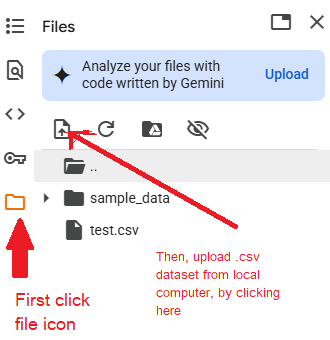

In [ ]:
import pandas as pd

burkina = pd.read_csv("/content/test.csv", index_col='ID')

In [ ]:
print("Dimensions of data :", burkina.shape)

Dimensions of data : (4795, 36)


In [ ]:
burkina.head(3)

,Province,toilet,own_beef,own_sheep,own_goat,own_donkey,own_chicken,own_guineafowl,own_turkey,own_duck,...,bike,moto,tractor,plough,car_truck,type_soil,type_roof,type_wall,pca_scores,wealth_q
ID,,,,,,,,,,,,,,,,,,,,,
1,BOULKIEMDE,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Cemented floor,Sheet metal,Earthen bricks,0.12200,2.0
2,BOULKIEMDE,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Dirt,Straw or wood,Earthen bricks,-0.15118,2.0
3,BOULKIEMDE,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Dirt,Sheet metal,Earthen bricks,-1.78772,0.0


In [ ]:
burkina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4795 entries, 1 to 4795
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province        4794 non-null   object 
 1   toilet          4793 non-null   float64
 2   own_beef        4793 non-null   float64
 3   own_sheep       4793 non-null   float64
 4   own_goat        4793 non-null   float64
 5   own_donkey      4793 non-null   float64
 6   own_chicken     4793 non-null   float64
 7   own_guineafowl  4793 non-null   float64
 8   own_turkey      4793 non-null   float64
 9   own_duck        4792 non-null   float64
 10  own_pigeon      4793 non-null   float64
 11  nblapins        6 non-null      float64
 12  drinking_water  4786 non-null   object 
 13  boil_water      4782 non-null   object 
 14  type_toilet     37 non-null     object 
 15  electricity     4794 non-null   float64
 16  tv              4794 non-null   float64
 17  radio           4794 non-null   float6

In [ ]:
display(burkina.describe()) #This generates summary statistics for the numerical columns.

,toilet,own_beef,own_sheep,own_goat,own_donkey,own_chicken,own_guineafowl,own_turkey,own_duck,own_pigeon,...,cook_gas,cook_manure,cook_millet,bike,moto,tractor,plough,car_truck,pca_scores,wealth_q
count,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4792.000000,4793.000000,...,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4.062000e+03,4062.000000
mean,0.131650,0.349468,0.426038,0.844356,0.648446,0.954726,0.565408,0.021698,0.018155,0.079491,...,0.011890,0.000626,0.007927,0.967251,0.374844,0.001877,0.452649,0.002712,7.385524e-08,1.999754
std,0.338145,0.476852,0.494551,0.362555,0.477505,0.207927,0.495755,0.145712,0.133527,0.270532,...,0.108402,0.025010,0.088687,0.177998,0.484133,0.043292,0.497805,0.052009,1.649466e+00,1.414475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.434810e+00,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.125473e+00,1.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.586000e-02,2.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.277980e+00,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.762780e+00,4.000000


# **Convert binary values to integer type**

In [ ]:
for col in burkina.columns:
    if burkina[col].dropna().isin([0.0, 1.0]).all():
        burkina[col] = burkina[col].astype('Int64')

In [ ]:
import matplotlib.pyplot as plt


print("Available variables :", burkina.columns.tolist())

# Dynamic visualization
def show_distribution(column):
    if burkina[column].dtype == 'object':
        burkina[column].value_counts().plot(kind='bar', title=f'Distribution of {column}')
    else:
        burkina[column].hist(bins=30)
    plt.show()

# Interactive widget
from ipywidgets import interact
interact(show_distribution, column=burkina.columns);

Available variables : ['Province', 'toilet', 'own_beef', 'own_sheep', 'own_goat', 'own_donkey', 'own_chicken', 'own_guineafowl', 'own_turkey', 'own_duck', 'own_pigeon', 'nblapins', 'drinking_water', 'boil_water', 'type_toilet', 'electricity', 'tv', 'radio', 'fridge', 'mobile', 'cook_biogas', 'cook_wood_hay', 'cook_coal', 'cook_gas', 'cook_manure', 'cook_millet', 'bike', 'moto', 'tractor', 'plough', 'car_truck', 'type_soil', 'type_roof', 'type_wall', 'pca_scores', 'wealth_q']


interactive(children=(Dropdown(description='column', options=('Province', 'toilet', 'own_beef', 'own_sheep', '…

**Visualization, exploration and management of missing values**

Missing data are processed according to their nature:

deletion of rows/columns if casi-null, or imputation (average, KNN, or iterative) to preserve information without introducing excessive bias.

<Axes: >

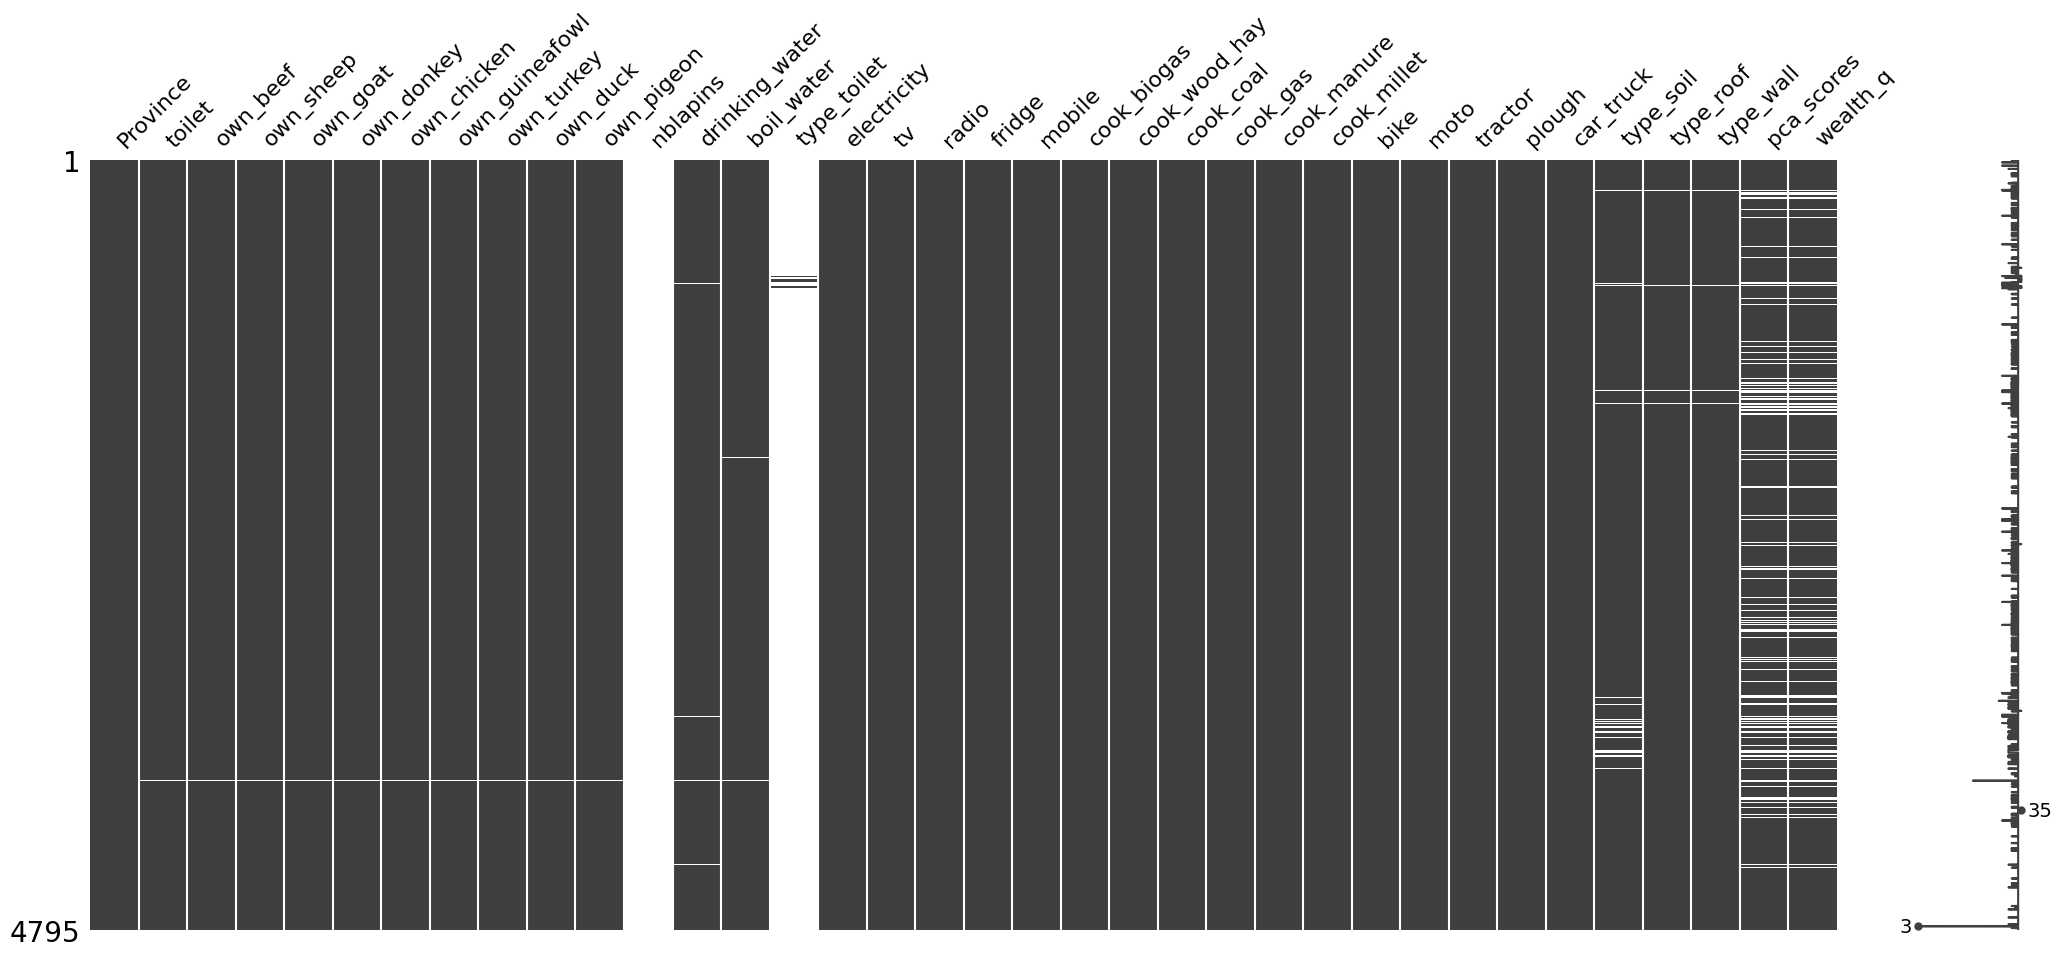

In [ ]:
import missingno as msno
msno.matrix(burkina)

<Axes: >

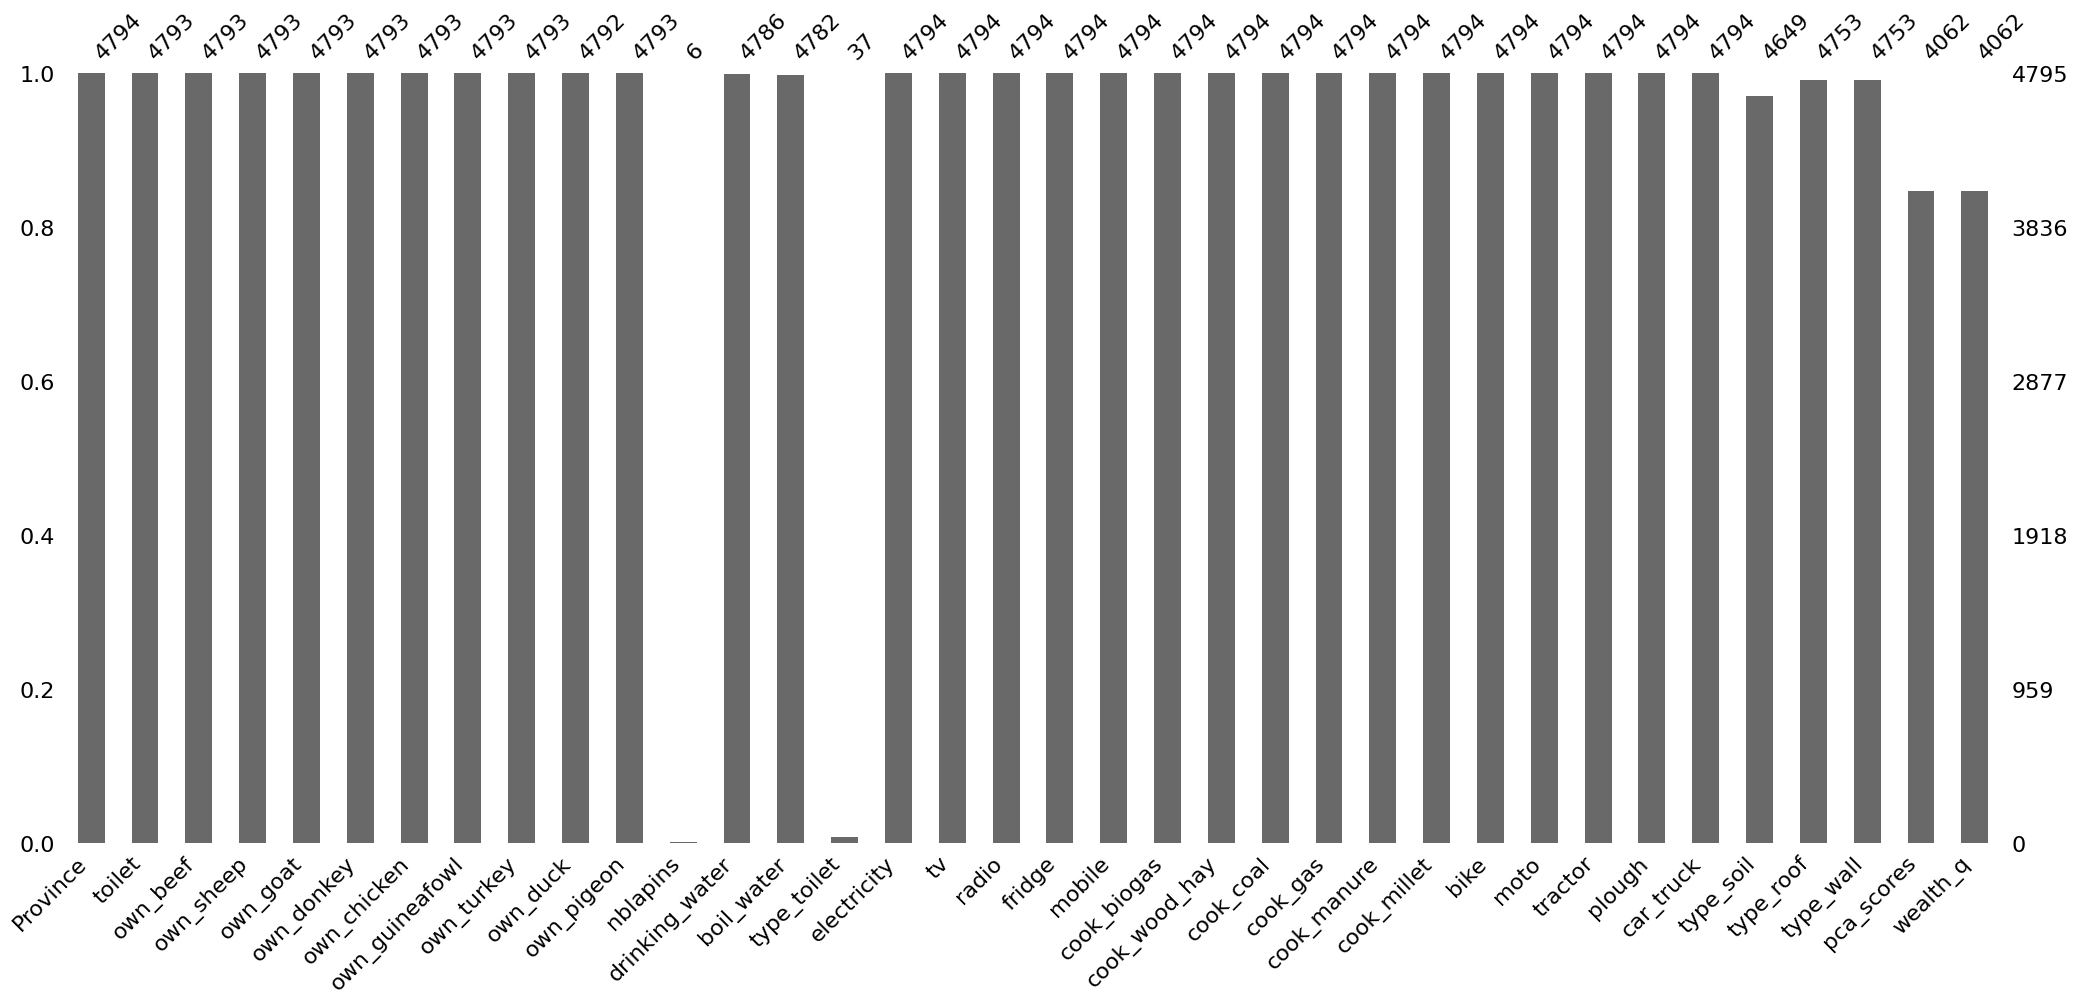

In [ ]:
msno.bar(burkina)

In [ ]:
# Calculation of the number and percentage of missing values per column
missing_per_col = burkina.isna().sum()
missing_ratio_per_col = burkina.isna().mean()

# DataFrame synthesis
summary = (
    pd.DataFrame({'n_missing': missing_per_col, 'ratio_missing': missing_ratio_per_col})
    .value_counts()
    .reset_index()
    .sort_values(by='n_missing')
)

print(" Breakdown of columns by missing values :\n")
display(summary.rename(columns={'count': 'nb_columns'}))

 Breakdown of columns by missing values :



,n_missing,ratio_missing,nb_columns
0,1,0.000209,17
1,2,0.000417,9
5,3,0.000626,1
4,9,0.001877,1
6,13,0.002711,1
2,42,0.008759,2
7,146,0.030448,1
3,733,0.152868,2
8,4758,0.992284,1
9,4789,0.998749,1


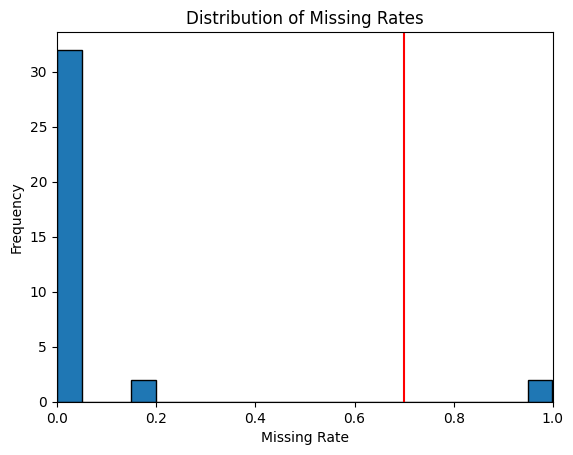

In [ ]:
import matplotlib.pyplot as plt
plt.hist(missing_ratio_per_col, bins=20, edgecolor='black', )
plt.xlabel('Missing Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Missing Rates')
plt.axvline(0.7, color='red')  # Current threshold
plt.xlim(0, 1)
plt.show()

**Removal of columns with >70% missing values**

In [ ]:
burkina_cleaned = burkina.drop(columns=['nblapins', 'type_toilet'],axis=1)

In [ ]:
# Calculation of the number and percentage of missing values per column
missing_per_col = burkina_cleaned.isna().sum()
missing_ratio_per_col = burkina_cleaned.isna().mean()

# DataFrame synthesis
summary = (
    pd.DataFrame({'n_missing': missing_per_col, 'ratio_missing': missing_ratio_per_col})
    .value_counts()
    .reset_index()
    .sort_values(by='n_missing')
)

print(" Breakdown of columns by missing values :\n")
display(summary.rename(columns={'count': 'nb_columns'}))


 Breakdown of columns by missing values :



,n_missing,ratio_missing,nb_columns
0,1,0.000209,17
1,2,0.000417,9
5,3,0.000626,1
4,9,0.001877,1
6,13,0.002711,1
3,42,0.008759,2
7,146,0.030448,1
2,733,0.152868,2


# **Delete lines that are too incomplete**

In [ ]:
# Calculation of the number and percentage of missing values per line
missing_per_row = burkina_cleaned.isna().sum(axis=1)
missing_ratio_per_row = burkina_cleaned.isna().mean(axis=1)

# Creating a synthesis DataFrame
summary = (
    pd.DataFrame({'n_missing': missing_per_row, 'ratio_missing': missing_ratio_per_row})
    .value_counts()
    .reset_index()
    .sort_values(by='n_missing')
)

# Display
print("Breakdown of rows by missing values:\n")
display(summary.rename(columns={'count': 'nb_rows'}))

Breakdown of rows by missing values:



,n_missing,ratio_missing,nb_rows
0,0,0.000000,4052
4,1,0.029412,10
1,2,0.058824,578
2,3,0.088235,110
5,4,0.117647,1
3,5,0.147059,41
6,6,0.176471,1
7,14,0.411765,1
8,31,0.911765,1


In [ ]:
# Deleting lines with too many missing values
threshold = 0.3  # Tolerance threshold

before = len(burkina_cleaned)
burkina_cleaned = burkina_cleaned[burkina_cleaned.isna().mean(axis=1) < threshold].copy()
after = len(burkina_cleaned)

print(f"Preserved lines : {after:,} / {before:,} (threshold : {int(threshold*100)}% max missing values)")
print(f" Deleted lines: {before - after:,}")

Preserved lines : 4,793 / 4,795 (threshold : 30% max missing values)
 Deleted lines: 2


In [ ]:
# Calculation of the number and percentage of missing values per line
missing_per_row = burkina_cleaned.isna().sum(axis=1)
missing_ratio_per_row = burkina_cleaned.isna().mean(axis=1)

# Creating a synthesis DataFrame
summary = (
    pd.DataFrame({'n_missing': missing_per_row, 'ratio_missing': missing_ratio_per_row})
    .value_counts()
    .reset_index()
    .sort_values(by='n_missing')
)

# Display
print("Distribution of lines by missing values :\n")
display(summary.rename(columns={'count': 'nb_rows'}))

Distribution of lines by missing values :



,n_missing,ratio_missing,nb_rows
0,0,0.000000,4052
4,1,0.029412,10
1,2,0.058824,578
2,3,0.088235,110
5,4,0.117647,1
3,5,0.147059,41
6,6,0.176471,1


# **Imputation of missing values**

Which imputation strategy should I choose?
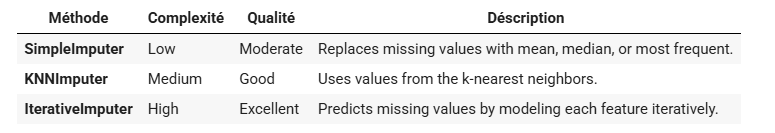

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer

NumPy is a foundational Python library for numerical computing, widely used in data science and machine learning. You’ll use it for things like arrays, mathematical operations, and handling missing values (e.g., np.nan).



1.   **IterativeImputer**: Uses multivariate imputation: each feature with missing values is predicted using other features in a round-robin fashion.It can model complex relationships using regressors.More accurate but computationally expensive.

2.  **KNNImputer:** Fills missing values using the k-nearest neighbors approach.For each missing value, it looks at the values from the nearest k rows (based on distance) and uses their values to impute.

3.  **SimpleImputer:** Basic imputer that fills missing values using a single strategy, such as: 'mean' (default) - replaces missing values with the mean of the column, 'median','most_frequent'or 'constant' (a user-defined value)





In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
burkina_cleaned = pd.DataFrame(imputer.fit_transform(burkina_cleaned), columns=burkina_cleaned.columns)

TypeError: boolean value of NA is ambiguous

In [ ]:
categorical_cols = ['Province', 'drinking_water', 'type_wall', 'type_roof', 'type_soil', 'boil_water']

# this conversion is not based on logical encoding!

# Convert categorical columns into numerical categories
cat_mappings = {}  # To restore categories after
for col in categorical_cols:
    burkina_cleaned[col] = burkina_cleaned[col].astype('category')
    cat_mappings[col] = burkina_cleaned[col].cat.categories  # Saving categories
    burkina_cleaned[col] = burkina_cleaned[col].cat.codes.replace(-1, np.nan)  # -1 = NaN


# Apply MICE with IterativeImputer
imputer = IterativeImputer(random_state=0, max_iter=100)
df_imputed_array = imputer.fit_transform(burkina_cleaned)
df_imputed = pd.DataFrame(df_imputed_array, columns=burkina_cleaned.columns)


# Convert imputed categorical columns into original categories
for col in categorical_cols:
    df_imputed[col] = df_imputed[col].round().astype(int)
    df_imputed[col] = pd.Categorical.from_codes(df_imputed[col], cat_mappings[col])

In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4793 entries, 0 to 4792
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Province        4793 non-null   category
 1   toilet          4793 non-null   float64 
 2   own_beef        4793 non-null   float64 
 3   own_sheep       4793 non-null   float64 
 4   own_goat        4793 non-null   float64 
 5   own_donkey      4793 non-null   float64 
 6   own_chicken     4793 non-null   float64 
 7   own_guineafowl  4793 non-null   float64 
 8   own_turkey      4793 non-null   float64 
 9   own_duck        4793 non-null   float64 
 10  own_pigeon      4793 non-null   float64 
 11  drinking_water  4793 non-null   category
 12  boil_water      4793 non-null   category
 13  electricity     4793 non-null   float64 
 14  tv              4793 non-null   float64 
 15  radio           4793 non-null   float64 
 16  fridge          4793 non-null   float64 
 17  mobile        

In [ ]:
df_imputed.head()

,Province,toilet,own_beef,own_sheep,own_goat,own_donkey,own_chicken,own_guineafowl,own_turkey,own_duck,...,bike,moto,tractor,plough,car_truck,type_soil,type_roof,type_wall,pca_scores,wealth_q
0,BOULKIEMDE,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Cemented floor,Sheet metal,Earthen bricks,0.12200,2.0
1,BOULKIEMDE,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Dirt,Straw or wood,Earthen bricks,-0.15118,2.0
2,BOULKIEMDE,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Dirt,Sheet metal,Earthen bricks,-1.78772,0.0
3,BOULKIEMDE,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Dirt,Sheet metal,Earthen bricks,-3.08899,0.0
4,BOULKIEMDE,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,Cemented floor,Sheet metal,Earthen bricks,1.40767,3.0


# Merge and/or create new columns

**Merge own_, cook_ variables**

It is possible to merge the animal possessions variable (own_), as well as the cooking method variable (cook_); this will reduce dimensionality, simplify interpretability, reduce noise...

For own_* variables, here are some possible grouping strategies


1.   Diversity (number of different types)
2.   Categories (large animals vs. poultry)
3.   Index weighted by economic value


The choice depends on the objectives of the analysis.

In [ ]:
# Animal diversity (number of different types owned)
#df_imputed['animal_diversity'] = df_imputed[['own_beef', 'own_sheep', 'own_goat', 'own_donkey', 'own_chicken', 'own_guineafowl',
#                                                         'own_turkey', 'own_duck', 'own_pigeon']].gt(0).sum(axis=1)

animal_weights = {
    'own_beef': 10,
    'own_sheep': 4,
    'own_goat': 3,
    'own_donkey': 5,
    'own_chicken': 1,
    'own_guineafowl': 1,
    'own_turkey': 2,
    'own_duck': 2,
    'own_pigeon': 0.5
}

# Creation of the weighted index
df_imputed['livestock_index'] = sum(df_imputed[animal] * weight for animal, weight in animal_weights.items())

"animal_weights" is a dictionary that maps different types of livestock (e.g., beef cattle, sheep, goats, etc.) to a weight value. The weight represents the relative importance or contribution of each animal type to a livestock index. For example:

Owning 1 cow (own_beef) contributes 10 to the index,

Owning 1 pigeon contributes 0.5.

In [ ]:
df_imputed['livestock_class'] = pd.qcut(df_imputed['livestock_index'], q=5, labels=['very low', 'low', 'medium', 'high', 'very high'])

# Verification
df_imputed[['livestock_index', 'livestock_class']].head()
df_imputed['livestock_class'].value_counts()

,count
livestock_class,
low,1222
very low,1198
high,845
very high,805
medium,723


**Note:** pd.qcut(...): This is a Pandas function that splits a continuous variable into equal-sized quantile bins.

In [ ]:
# Delete the index variable and own_* variables
df_imputed.drop(columns=['livestock_index', 'own_beef', 'own_sheep', 'own_goat', 'own_donkey',
                         'own_chicken', 'own_guineafowl', 'own_turkey', 'own_duck', 'own_pigeon'], inplace=True)

**The feature pca_score**

The variable pca_score seems to be created from the other variables.

In [ ]:
from sklearn.decomposition import PCA

numerical_cols = df_imputed.select_dtypes(include=['float64', 'int64']).columns.tolist()

exclusions = ['pca_scores']#, 'wealth_q']
features_for_pca = [col for col in numerical_cols if col not in exclusions]

**Note:** PCA is a dimensionality reduction technique that transforms your dataset into a smaller number of uncorrelated variables called principal components while retaining as much variability (information) as possible.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed[features_for_pca])

pca = PCA(n_components=1)
pca_score = pca.fit_transform(X_scaled)
df_imputed['pca_scoressss'] = pca_score

In [ ]:
df_imputed['pca_scoressss'].corr(df_imputed['pca_scores'])

np.float64(0.9088188013602201)

# Encoding categorical variables

# Ordinal characteristics and study objectives

Ordinal characteristics are sometimes simple to identify, but determining their correct order often requires a better understanding of the objective and context of the study.

**Example**: type_toit = (Straw, Mud, Sheet metal, Concrete) may be interpreted differently depending on the target variable:

If the objective is to predict household wealth, we can assume that the order reflects increasing quality or cost.

A natural ordinal coding would therefore be: Straw < Mud < Sheet metal < Concrete.

On the other hand, if the objective is to predict thermal insulation or storm risk, the order might be different, as straw might offer better insulation than sheet metal.

**Conclusion**

When coding categorical features with a potential order, we need to consider :

*   type of analysis (supervised or unsupervised);
*   target variable (if applicable)
*   domain knowledge.

Using an inappropriate order can introduce bias or distort the patterns learned by the model.

## Exploration

Variable type considerations

1. Province

Clear categorical nature: No inherent order exists between provinces.

2. boil_water and livestock
Natural order

3. Other characteristics

Ordinality depends on the type of analysis:

*   Supervised: Target variable may reveal implicit order

*   Unsupervised: Domain knowledge determines ordinality (if any).

In [ ]:
display(df_imputed['Province'].value_counts(dropna=False))
display(df_imputed["type_roof"].value_counts(dropna=False))
display(df_imputed["type_wall"].value_counts(dropna=False))
display(df_imputed["type_soil"].value_counts(dropna=False))
display(df_imputed["drinking_water"].value_counts(dropna=False))
display(df_imputed["boil_water"].value_counts(dropna=False))
display(df_imputed["livestock_class"].value_counts(dropna=False))

,count
Province,
BOULKIEMDE,2402
SANGUIE,1593
NAYALA,798


,count
type_roof,
Sheet metal,2670
Mud,1806
Straw or wood,299
Concrete,18


,count
type_wall,
Earthen bricks,4613
Machine cut bricks,62
No wall,50
Cement or concrete,44
Fired bricks,11
Stone,9
Metal or sheet metal,2
Straw,2


,count
type_soil,
Dirt,2802
Cemented floor,1973
Rug on the floor,18


,count
drinking_water,
Drilled well,2067
Open well,1411
Bore hole well,740
Traditional well,547
Public tap,14
Tap water,10
River/pool,4


,count
boil_water,
Never,4695
Most of the time,61
Sometimes,37


,count
livestock_class,
low,1222
very low,1198
high,845
very high,805
medium,723


## One-hot encoding (for columns in no natural order)

In [ ]:
hot_encoded_data = pd.get_dummies(df_imputed, columns=['Province', 'drinking_water', 'type_wall', 'type_roof', 'type_soil'],
                                      prefix=['Province', 'drinking_water', 'type_wall', 'type_roof', 'type_soil'], dtype=int)

In [ ]:
hot_encoded_data.columns

Index(['toilet', 'boil_water', 'electricity', 'tv', 'radio', 'fridge',
       'mobile', 'cook_biogas', 'cook_wood_hay', 'cook_coal', 'cook_gas',
       'cook_manure', 'cook_millet', 'bike', 'moto', 'tractor', 'plough',
       'car_truck', 'pca_scores', 'wealth_q', 'livestock_class',
       'pca_scoressss', 'Province_BOULKIEMDE', 'Province_NAYALA',
       'Province_SANGUIE', 'drinking_water_Bore hole well',
       'drinking_water_Drilled well', 'drinking_water_Open well',
       'drinking_water_Public tap', 'drinking_water_River/pool',
       'drinking_water_Tap water', 'drinking_water_Traditional well',
       'type_wall_Cement or concrete', 'type_wall_Earthen bricks',
       'type_wall_Fired bricks', 'type_wall_Machine cut bricks',
       'type_wall_Metal or sheet metal', 'type_wall_No wall',
       'type_wall_Stone', 'type_wall_Straw', 'type_roof_Concrete',
       'type_roof_Mud', 'type_roof_Sheet metal', 'type_roof_Straw or wood',
       'type_soil_Cemented floor', 'type_soil_Dirt',

In [ ]:
hot_encoded_data.head()

,toilet,boil_water,electricity,tv,radio,fridge,mobile,cook_biogas,cook_wood_hay,cook_coal,...,type_wall_No wall,type_wall_Stone,type_wall_Straw,type_roof_Concrete,type_roof_Mud,type_roof_Sheet metal,type_roof_Straw or wood,type_soil_Cemented floor,type_soil_Dirt,type_soil_Rug on the floor
0,0.0,Never,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,1,0,0
1,0.0,Never,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,1,0
2,0.0,Never,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,0.0,Never,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,1,0
4,0.0,Never,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,1,0,0


## Label encoding for boil_water (manually defined order)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(
    categories=[['Never', 'Sometimes', 'Most of the time']],
    handle_unknown='use_encoded_value',
    unknown_value=-1  # ou np.nan
)

hot_encoded_data['boil_water'] = ordinal_encoder.fit_transform(
    df_imputed[['boil_water']]
).flatten()

In [ ]:
ordinal_encoder = OrdinalEncoder(
    categories=[['very low', 'low', 'medium', 'high', 'very high']],
    handle_unknown='use_encoded_value',
    unknown_value=-1  # ou np.nan
)

hot_encoded_data['livestock_class'] = ordinal_encoder.fit_transform(
    df_imputed[['livestock_class']]
).flatten()

In [ ]:
hot_encoded_data['livestock_class'] = hot_encoded_data['livestock_class'].astype(int)

In [ ]:
hot_encoded_data['livestock_class']

,livestock_class
0,2
1,2
2,0
3,0
4,3
...,...
4788,0
4789,4
4790,1
4791,1


## Standardization, normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Min-Max normalization between 0 and 1
scaler = MinMaxScaler()
hot_encoded_data['boil_water'] = scaler.fit_transform(hot_encoded_data[['boil_water']])
hot_encoded_data['livestock_class'] = scaler.fit_transform(hot_encoded_data[['livestock_class']])

In [ ]:
import matplotlib.pyplot as plt


print("Variables disponibles :", hot_encoded_data.columns.tolist())

# Visualisation dynamique
def show_distribution(column):
    if hot_encoded_data[column].dtype == 'object':
        hot_encoded_data[column].value_counts().plot(kind='bar', title=f'Distribution de {column}')
    else:
        hot_encoded_data[column].hist(bins=30)
    plt.show()

# Widget interactif
from ipywidgets import interact
interact(show_distribution, column=hot_encoded_data.columns);

Variables disponibles : ['toilet', 'boil_water', 'electricity', 'tv', 'radio', 'fridge', 'mobile', 'cook_biogas', 'cook_wood_hay', 'cook_coal', 'cook_gas', 'cook_manure', 'cook_millet', 'bike', 'moto', 'tractor', 'plough', 'car_truck', 'pca_scores', 'wealth_q', 'livestock_class', 'pca_scoressss', 'Province_BOULKIEMDE', 'Province_NAYALA', 'Province_SANGUIE', 'drinking_water_Bore hole well', 'drinking_water_Drilled well', 'drinking_water_Open well', 'drinking_water_Public tap', 'drinking_water_River/pool', 'drinking_water_Tap water', 'drinking_water_Traditional well', 'type_wall_Cement or concrete', 'type_wall_Earthen bricks', 'type_wall_Fired bricks', 'type_wall_Machine cut bricks', 'type_wall_Metal or sheet metal', 'type_wall_No wall', 'type_wall_Stone', 'type_wall_Straw', 'type_roof_Concrete', 'type_roof_Mud', 'type_roof_Sheet metal', 'type_roof_Straw or wood', 'type_soil_Cemented floor', 'type_soil_Dirt', 'type_soil_Rug on the floor']


interactive(children=(Dropdown(description='column', options=('toilet', 'boil_water', 'electricity', 'tv', 'ra…